In [15]:
# Importing necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [16]:
# Reading csv file in the form of dataframe
stroke=pd.read_csv("healthcare-dataset-stroke-data.csv")
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [17]:
#Function to group ages, BMI, and average glucose levels.
def group_data(row):
    # Age groups
    if row['age'] <= 1:
        age_group = 'Infants'
    elif row['age'] <= 12:
        age_group = 'Children'
    elif row['age'] <= 17:
        age_group = 'Teenager'
    elif row['age'] <= 44:
        age_group = 'Adult'
    elif row['age'] <= 60:
        age_group = 'Middle_Aged'
    else:
        age_group = 'Older_Adult'

    # BMI groups
    if row['bmi'] < 18.5:
        bmi_group = 'Underweight'
    elif row['bmi'] < 24.9:
        bmi_group = 'Healthy Weight'
    elif row['bmi'] < 29.9:
        bmi_group = 'Overweight'
    elif row['bmi'] < 40:
        bmi_group = 'Obesity'
    else:
        bmi_group = 'Severe Obesity'

    # Glucose groups
    if row['avg_glucose_level'] < 100:
        glucose_group = 'Normal'
    elif row['avg_glucose_level'] <= 125:
        glucose_group = 'Prediabetes'
    else:
        glucose_group = 'Diabetes'

    # Return all groups
    return pd.Series({'age_group': age_group,
                      'BMI_class': bmi_group,
                      'glucose_class': glucose_group})

# Apply the function to the data
stroke[['age_group', 'BMI_class', 'glucose_class']] = stroke.apply(group_data, axis=1)

# View the updated data
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,BMI_class,glucose_class
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Older_Adult,Obesity,Diabetes
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Older_Adult,Severe Obesity,Diabetes
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Older_Adult,Obesity,Prediabetes
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Middle_Aged,Obesity,Diabetes
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Older_Adult,Healthy Weight,Diabetes


In [18]:
# Dropping the ID column

stroke.drop(['id'], axis=1, inplace=True)
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
 11  age_group          5110 non-null   object 
 12  BMI_class          5110 non-null   object 
 13  glucose_class      5110 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 559.0+ KB


# 1.Handling missing values in the BMI column. 

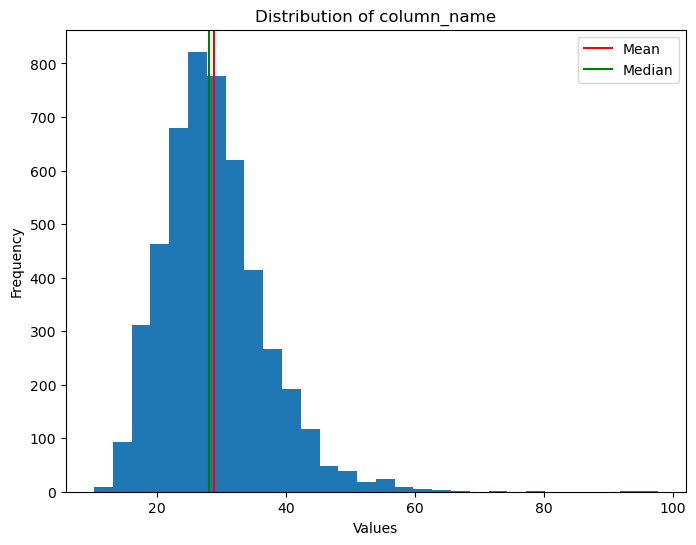

In [19]:
import matplotlib.pyplot as plt

column_data = stroke['bmi']

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(column_data, bins=30)

# Calculate mean and median
mean_value = column_data.mean()
median_value = column_data.median()

# Plot mean and median lines
plt.axvline(mean_value, color='red',label='Mean')
plt.axvline(median_value, color='green',label='Median')

# Add labels and legend
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of ' + 'column_name')
plt.legend()

# Show plot
plt.show()


    Since we have right skewed distribution in the column as the majority of the data points are concentrated on the left side of the distribution, we are going to use the median to fill the missing values.

In [20]:
# fill the missing values with median BMI
stroke.fillna(value=stroke.bmi.median(), axis=1, inplace=True)
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gender             5110 non-null   object
 1   age                5110 non-null   object
 2   hypertension       5110 non-null   object
 3   heart_disease      5110 non-null   object
 4   ever_married       5110 non-null   object
 5   work_type          5110 non-null   object
 6   Residence_type     5110 non-null   object
 7   avg_glucose_level  5110 non-null   object
 8   bmi                5110 non-null   object
 9   smoking_status     5110 non-null   object
 10  stroke             5110 non-null   object
 11  age_group          5110 non-null   object
 12  BMI_class          5110 non-null   object
 13  glucose_class      5110 non-null   object
dtypes: object(14)
memory usage: 559.0+ KB


# 2.Changing the 'Other' value in the gender column to 'Female'

In [21]:
import pandas as pd

column_data = stroke['gender']

# Calculate number of unique values and their frequencies
unique_values_count = column_data.nunique()
value_counts = column_data.value_counts()

print("Number of unique values:", unique_values_count)
print("Frequency of each value:")
print(value_counts)


Number of unique values: 3
Frequency of each value:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


In [22]:
print("Before Change: ", stroke['gender'].unique())

# Converting Other to Female gender as it has the highest frequency.
stroke['gender'] = stroke['gender'].replace('Other', 'Female')

print("After Change: ", stroke['gender'].unique())

Before Change:  ['Male' 'Female' 'Other']
After Change:  ['Male' 'Female']


# 3.Changing the values of people under 18 with 'Unknown' smoking status to 'never smoked' assuming that they do not smoke.

In [24]:
import pandas as pd

column_data = stroke['smoking_status']

# Calculate number of unique values and their frequencies
unique_values_count = column_data.nunique()
value_counts = column_data.value_counts()

print("Number of unique values:", unique_values_count)
print("Frequency of each value:")
print(value_counts)


Number of unique values: 4
Frequency of each value:
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


In [25]:
print("Initial Count of Unknown Smoking Status:", stroke[stroke['smoking_status'] == 'Unknown'].shape[0])

stroke.loc[stroke['age'] < 18, 'smoking_status'] = 'never smoked'

print("Current Count of Unknown Smoking Status:", stroke[stroke['smoking_status'] == 'Unknown'].shape[0])


Initial Count of Unknown Smoking Status: 1544
Current Count of Unknown Smoking Status: 862


# 4.Changing the "children" under work_type to "Never_worked" assuming that children dont work.

In [26]:
import pandas as pd

column_data = stroke['work_type']

# Calculate number of unique values and their frequencies
unique_values_count = column_data.nunique()
value_counts = column_data.value_counts()

print("Number of unique values:", unique_values_count)
print("Frequency of each value:")
print(value_counts)


Number of unique values: 5
Frequency of each value:
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64


In [27]:
stroke.loc[stroke['work_type'] == 'children', 'work_type'] = 'Never_worked'

# View the counts of values in the 'work_type' column
stroke.work_type.value_counts()

work_type
Private          2925
Self-employed     819
Never_worked      709
Govt_job          657
Name: count, dtype: int64

# 5.Encoding Categorical Data

    1.Label Encoding will be used for the ordinal features so we can preserve the order of the categories
    2.OneHot Encoding will be used for other nominal features since there are no inherent order in the categories.


In [9]:
# Importing LabelEncoder and OneHot Encoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def label_encode(df, col_list):
    le = LabelEncoder()
    
    for col in col_list:
        df[col] = le.fit_transform(df[col])
    
    return df

def onehot_encode(df, col_list):
    ohe = OneHotEncoder()
    
    ohe_result = ohe.fit_transform(df[col_list])
    ohe_df = pd.DataFrame(ohe_result.toarray(), columns=ohe.get_feature_names_out(col_list))
    
    df = pd.concat([df,ohe_df], axis=1)
    df = df.drop(columns=col_list, axis=1)
    
    return df

In [10]:
# Encoding the ordinal features with the LabelEncoder
label_encode(stroke, ['age_group', 'BMI_class', 'glucose_class'])

# Encoding the nominal features with the OneHot Encoder
stroke = onehot_encode(stroke, ['work_type', 'smoking_status', 'gender', 'ever_married', 'Residence_type'])

stroke.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   object 
 1   hypertension                    5110 non-null   object 
 2   heart_disease                   5110 non-null   object 
 3   avg_glucose_level               5110 non-null   object 
 4   bmi                             5110 non-null   object 
 5   stroke                          5110 non-null   object 
 6   age_group                       5110 non-null   int64  
 7   BMI_class                       5110 non-null   int64  
 8   glucose_class                   5110 non-null   int64  
 9   work_type_Govt_job              5110 non-null   float64
 10  work_type_Never_worked          5110 non-null   float64
 11  work_type_Private               5110 non-null   float64
 12  work_type_Self-employed         51

In [11]:
# Ensuring all columns are numeric

# Columns that are type 'object'
cols = stroke.columns[stroke.dtypes.eq('object')]

# convert the columns to numeric
stroke[cols] = stroke[cols].apply(pd.to_numeric, errors='coerce')

stroke.dtypes


age                               float64
hypertension                        int64
heart_disease                       int64
avg_glucose_level                 float64
bmi                               float64
stroke                              int64
age_group                           int64
BMI_class                           int64
glucose_class                       int64
work_type_Govt_job                float64
work_type_Never_worked            float64
work_type_Private                 float64
work_type_Self-employed           float64
smoking_status_Unknown            float64
smoking_status_formerly smoked    float64
smoking_status_never smoked       float64
smoking_status_smokes             float64
gender_Female                     float64
gender_Male                       float64
ever_married_No                   float64
ever_married_Yes                  float64
Residence_type_Rural              float64
Residence_type_Urban              float64
dtype: object

In [12]:
stroke.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,age_group,BMI_class,glucose_class,work_type_Govt_job,...,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Female,gender_Male,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban
0,67.0,0,1,228.69,36.6,1,4,1,0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,61.0,0,0,202.21,28.1,1,4,3,0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,80.0,0,1,105.92,32.5,1,4,1,2,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,49.0,0,0,171.23,34.4,1,3,1,0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
4,79.0,1,0,174.12,24.0,1,4,0,0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [13]:
# Writing the combined dataframe to a new CSV file
stroke.to_csv('healthcare-dataset-stroke-data-version-3.csv',index=False)